In [1]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist, mnist
import datetime
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt
from utils import *

# Load the data
The MNIST sort of became too easy. We get levels close to 99%, so it get's increasingly harder to see what improves or not. So we want a set that is harder. The fashion_mnist is a bit harder, but still doable with relative easy techniques. We can still train on a default laptop, while it is hard enough to have some space for tweaking and improving.

In [2]:
(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.4, random_state=42)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_valid.shape, y_valid.shape

((6000, 28, 28), (6000,))

In [3]:
# labels are sparse
y_valid

array([9, 3, 3, ..., 8, 6, 0], dtype=uint8)

Let's explore the set a bit.

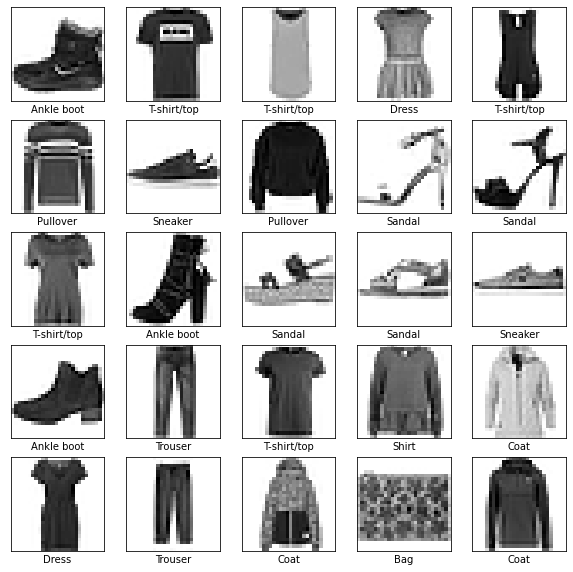

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Baseline
Build a baseline deep learning model with settings you guess are simple, but good enough to give you a baseline to improve. E.g. try just one or two layers of Dense layers.

Store results and scores.

If you are curious about simple (non-deep learning models) You can have a look here [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#) for benchmarks with simple models. Note the trainingtime, before you attempt to reproduce this with a simple model; some really take hours! Also try to sort the models by accuracy, and note the best model: an SVC with a kernel... Downside is, that it takes more than an hour to run.

In [5]:
result = {}
score = {}

In [6]:
%%time
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
from tensorflow.keras.layers import Reshape
tf.random.set_seed(42)
model = Sequential([
    Rescaling(1./255),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
result['base'] = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 1)
score['base']=model.evaluate(X_test, y_test)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6817 - accuracy: 0.7637 - val_loss: 0.4323 - val_accuracy: 0.8435
Epoch 2/100
1875/1875 [==============================] - 2s 949us/step - loss: 0.3834 - accuracy: 0.8605 - val_loss: 0.4642 - val_accuracy: 0.8407
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3547 - accuracy: 0.8693 - val_loss: 0.3766 - val_accuracy: 0.8643
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3265 - accuracy: 0.8796 - val_loss: 0.3974 - val_accuracy: 0.8517
Epoch 5/100
1875/1875 [==============================] - 2s 917us/step - loss: 0.3155 - accuracy: 0.8824 - val_loss: 0.3750 - val_accuracy: 0.8660
Epoch 6/100
1875/1875 [==============================] - 2s 902us/step - loss: 0.3017 - accuracy: 0.8881 - val_loss: 0.3818 - val_accuracy: 0.8575
Epoch 7/100
1875/1875 [==============================] - 2s 837us/step - loss: 0.2820 - accuracy: 0.8944 - val_loss: 0.3743 

# Dropout, Batchnorm, activations

Experiment manually with batchnorm, drops and different activations to get a sense of how they impact the model. 
Store your results in dictionaries, such that is it easy to compare (see lesson for examples). If you want to test with `Conv2D` and `MaxPool2D` layers, you can use `Reshape((28,28,1))` to get the desired 4D shape for image convolutions.

Getting above 90% on the testset is actually pretty good for the fashion mnist.
 

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
rs1 = X_train.reshape((60000, 28, 28, 1))
rs1.shape

(60000, 28, 28, 1)

In [9]:
from tensorflow.keras.layers import Reshape
x = X_train[:32]
rs3 = Reshape((28,28,1))(x)
rs3.shape, x.shape

(TensorShape([32, 28, 28, 1]), (32, 28, 28))

In [10]:
%%time
tf.random.set_seed(42)
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model = Sequential([
    Rescaling(1./255),
    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
result['hugedense'] = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), 
                            callbacks=[early_stop],verbose = 1)
score['hugedense']=model.evaluate(X_test, y_test)

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6630 - accuracy: 0.7792 - val_loss: 0.4272 - val_accuracy: 0.8423
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4240 - accuracy: 0.8466 - val_loss: 0.4917 - val_accuracy: 0.8310
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3880 - accuracy: 0.8597 - val_loss: 0.4035 - val_accuracy: 0.8547
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3634 - accuracy: 0.8664 - val_loss: 0.3747 - val_accuracy: 0.8585
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3424 - accuracy: 0.8735 - val_loss: 0.3690 - val_accuracy: 0.8675
Epoch 6/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3286 - accuracy: 0.8793 - val_loss: 0.3745 - val_accuracy: 0.8620
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3123 - accuracy: 0.8840 - val_loss: 0.3918 - val_ac

In [11]:
%%time

from tensorflow.keras.layers import Reshape
tf.random.set_seed(42)
model = Sequential([
    Rescaling(1./255),
    Reshape((28,28,1)),
    Conv2D(32, [5,5], padding='same', activation='relu', input_shape=[28,28,1]),
    MaxPool2D([2,2], strides=2),
    Conv2D(64, [5,5], padding='same', activation='relu'),
    MaxPool2D([2,2]),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
result['conv'] = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 1)
score['conv']=model.evaluate(X_test, y_test)

Epoch 1/100
1875/1875 [==============================] - 66s 35ms/step - loss: 0.5489 - accuracy: 0.8013 - val_loss: 0.3074 - val_accuracy: 0.8902
Epoch 2/100
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2620 - accuracy: 0.9046 - val_loss: 0.3136 - val_accuracy: 0.8868
Epoch 3/100
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2278 - accuracy: 0.9155 - val_loss: 0.2600 - val_accuracy: 0.9050
Epoch 4/100
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1925 - accuracy: 0.9294 - val_loss: 0.2489 - val_accuracy: 0.9158
Epoch 5/100
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1674 - accuracy: 0.9363 - val_loss: 0.2549 - val_accuracy: 0.9113
Epoch 6/100
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1432 - accuracy: 0.9452 - val_loss: 0.2615 - val_accuracy: 0.9107
Epoch 7/100
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1191 - accuracy: 0.9550 - val_loss: 0

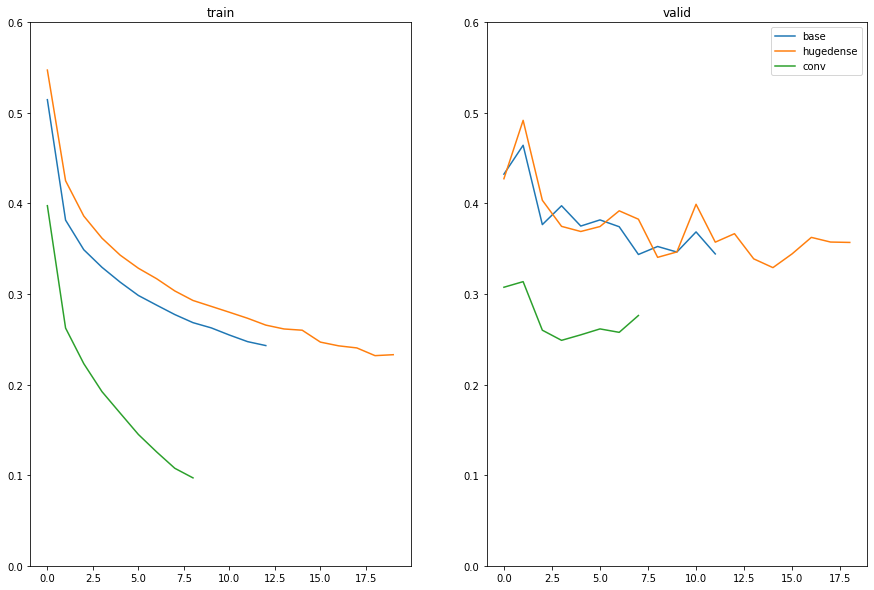

In [12]:
plot_results(result,ymin=0, ymax=0.6, yscale='linear')

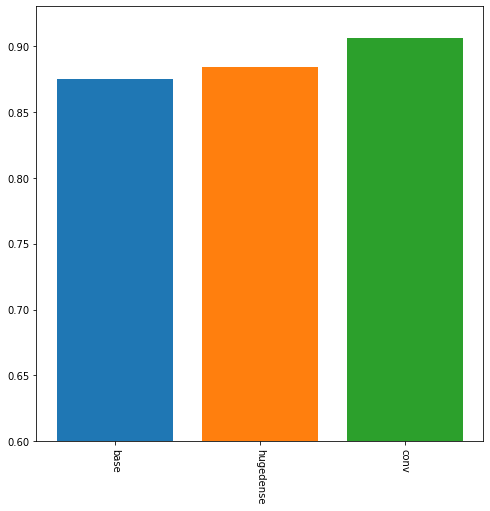

In [13]:
plot_scores(score, ymin=0.6, ymax=0.93)

In [ ]:
score

In [ ]:
plot_scores(score, ymin=0.6, ymax=1)

Save your best manual tuned model.

In [ ]:
model.save('manual_tune.h5')

# Hypertuning
Build a hypermodel. Start with broad settings, and use `hp.Fixed` to fixate things your are fairly sure about. You should be able to get above 90% accuracy on the testset.

In [14]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Reshape

def build_model(hp):
    input = Input(shape = [28,28])
    x = Rescaling(1./255)(input)
    x = Reshape((28,28,1))(x)
    
    filters = hp.Int('filters', 16, 128, 16)
    kernelsize = hp.Int('kernel', 2, 5)
    strides = hp.Int('strides', 1, 2)
    x = Conv2D(filters, [kernelsize,kernelsize], padding='valid', strides=(strides,strides), activation='relu')(x)
    x = MaxPool2D((2, 2))(x)
    
    for i in range(hp.Int('conv_layers', 0, 1)):
        x = Conv2D(filters, [kernelsize, kernelsize], padding='valid', strides=(strides,strides), activation='relu')(x)
        x = MaxPool2D((2,2))(x)
        name = 'convlayer_{0}'.format(i)
        
    flat = Flatten()(x)

    units = hp.Int('units', 64, 1024, 64)
    act = 'relu'
    drops = hp.Float('drops', 0.1, 0.4)

    x = Dense(units, activation=act)(flat)
    x = BatchNormalization()(x)
    x = Dropout(drops)(x)

    for i in range(hp.Int('dense_layers', 0, 5)):
        name = 'layer_{0}'.format(i)
        x = Dense(units=units, activation=act)(x)
        x = BatchNormalization()(x)
        x = Dropout(drops)(x)
    
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs = [input], outputs = [output])
    model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    return model

In [16]:
import kerastuner as kt
# cleaning up folders from old runs
!rm -rf ktuner/

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=5, # increasing the amount of epochs will increase the amount of trials
    factor=3, # decreasing the factor will increase the amount of trials
    seed=10, # by setting the seed, you guarantee the same outcome every time you run the hyperband
    hyperband_iterations=1, # run the complete algorithm more than once, starting from scratch every time.
    directory='ktuner',
    project_name='fashion_mnist'
)
tuner.search(X_train, y_train, validation_data = (X_valid, y_valid), verbose=1)

Trial 10 Complete [00h 03m 09s]
val_loss: 0.2737864851951599

Best val_loss So Far: 0.2728980779647827
Total elapsed time: 00h 27m 18s
INFO:tensorflow:Oracle triggered exit


In [17]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(best_hps.values)
model = tuner.get_best_models()[0]

{'filters': 80, 'kernel': 3, 'strides': 1, 'conv_layers': 0, 'units': 192, 'drops': 0.38957264246563694, 'dense_layers': 2, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': 'f2f87a94b92d23c486042dfb7f0edae3'}


In [18]:
%%time 
result['hyper'] = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 1)

Epoch 1/100
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2795 - accuracy: 0.8984 - val_loss: 0.2752 - val_accuracy: 0.9047
Epoch 2/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2464 - accuracy: 0.9116 - val_loss: 0.3419 - val_accuracy: 0.8800
Epoch 3/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2264 - accuracy: 0.9167 - val_loss: 0.2747 - val_accuracy: 0.9037
Epoch 4/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2556 - accuracy: 0.9086 - val_loss: 0.2530 - val_accuracy: 0.9125
Epoch 5/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2368 - accuracy: 0.9135 - val_loss: 0.2570 - val_accuracy: 0.9132
Epoch 6/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2232 - accuracy: 0.9188 - val_loss: 0.2623 - val_accuracy: 0.9103
Epoch 7/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2089 - accuracy: 0.9248 - val_loss: 0

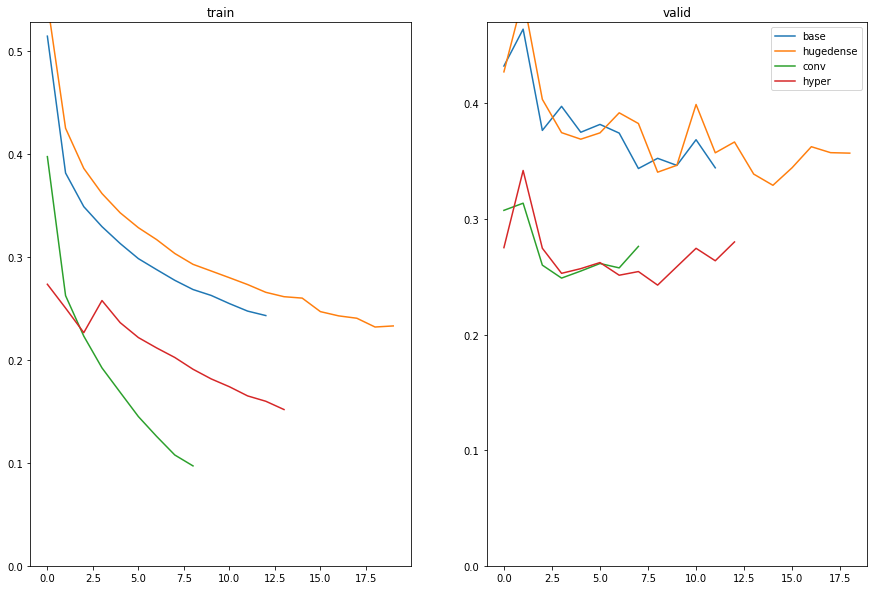

In [19]:
plot_results(result)

In [20]:
score['hyper']=model.evaluate(X_test, y_test)

125/125 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.9087


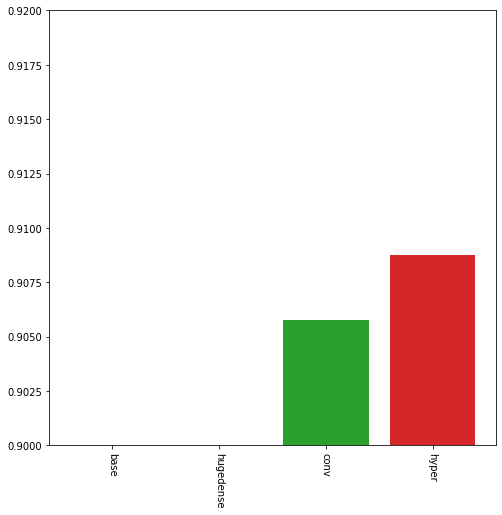

In [21]:
plot_scores(score, ymin=0.9, ymax=0.92)

In [ ]:
model.save('hypertune.h5')

In [ ]:
model = load_model('hypertune.h5')
model.summary()